In [7]:
import os

import cv2


DATA_DIR = './data'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 3
dataset_size = 100

cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [1]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
DATA_DIR = 'C:\\Users\\keath\\Desktop\\jupyter\\Midterm\\data'

data=[]
labels=[]
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR,dir_)):
        data_aux=[]
        img=cv2.imread(os.path.join(DATA_DIR,dir_,img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            for hands_landmarks in result.multi_hand_landmarks:
               for i in range(len(hands_landmarks.landmark)):
                   x= hands_landmarks.landmark[i].x
                   y= hands_landmarks.landmark[i].y
                   z= hands_landmarks.landmark[i].z
                   data_aux.append(x)
                   data_aux.append(y)
                
            data.append(data_aux)
            labels.append(dir_)



f = open('data.pickle','wb')
pickle.dump({'data':data,'labels':labels},f)
f.close()

In [ ]:
print("hello:")


In [2]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))
print(cm)

# f = open('model.p', 'wb')
# pickle.dump({'model': model}, f)
# f.close()




100.0% of samples were classified correctly !
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


In [6]:
import cv2 
import mediapipe as mp
import pickle
import numpy as np
cap = cv2.VideoCapture(1)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

model_dict = pickle.load(open('C:\\Users\\keath\\Desktop\\jupyter\\Midterm\\model.p', 'rb'))

model = model_dict['model']
labels_dict = {0:'A',1:'B',2:'C'}
while True:
    ret, frame = cap.read()


    data_aux = []
    x_=[]
    y_=[]
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    H ,W , _ =frame.shape
    result = hands.process(frame_rgb)
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                    frame, 
                    hand_landmarks,  
                    mp_hands.HAND_CONNECTIONS, 
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
    
        for hands_landmarks in result.multi_hand_landmarks:
               for i in range(len(hands_landmarks.landmark)):
                   x= hands_landmarks.landmark[i].x
                   y= hands_landmarks.landmark[i].y
                   z= hands_landmarks.landmark[i].z
                   data_aux.append(x)
                   data_aux.append(y)
                   x_.append(x)
                   y_.append(y)
        
        prediction =  model.predict([np.asarray(data_aux)])
        x1=int(min(x_)*W)-10
        y1=int(min(y_)*H)-10
        x2=int(max(x_)*W)-10
        y2=int(max(y_)*H)-10
        predicted_character = labels_dict[int(prediction[0])]
       
        cv2.rectangle(frame, (x1,y1),(x2,y2),(0,0,0),4)
        cv2.putText(frame,predicted_character,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1.3,(0,0,0),3,cv2.LINE_AA)

    cv2.imshow('frame', frame)  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



Evaluation Results:
-------------------
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


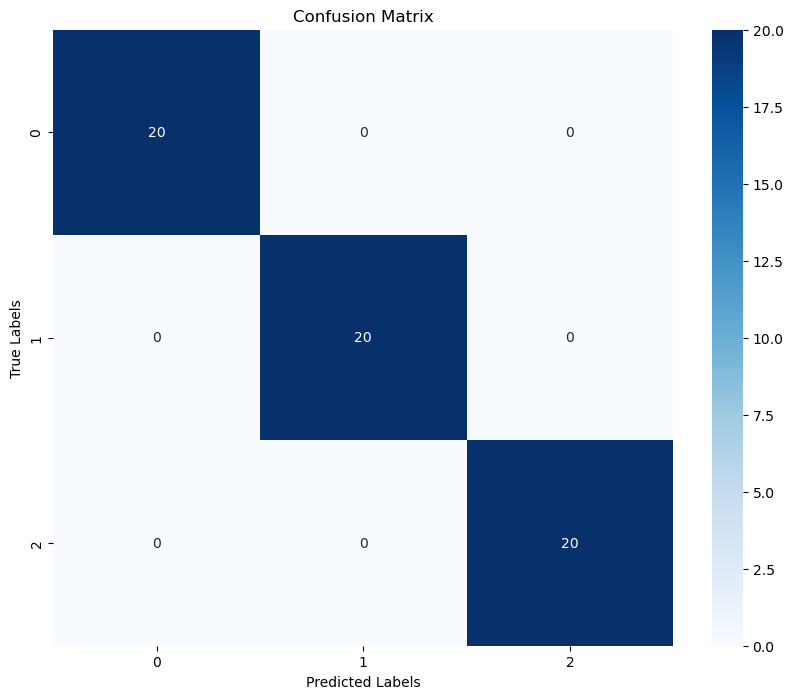

In [7]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

class_report = classification_report(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

print('Evaluation Results:')
print('-------------------')
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))
print('\nClassification Report:')
print(class_report)
print('\nConfusion Matrix:')
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
